# Problem 0: Metrics vs Loss functions
As we said in lecture, we optimize (minimize) the loss function, but monitor metrics without letting the model know about their value.

A very common loss/metric pair is crossentropy for the loss and accuracy for the metric. Often, these two numbers correlate, but they are not guaranteed to do some.

In this problem, you will come up with 3 sets of 20 synthetic values for predicted probability in a binary classification problem where the crossentropy and accuracy are anti correlated. Plot the loss vs the accuracy.

In [1]:
# safe to restart
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

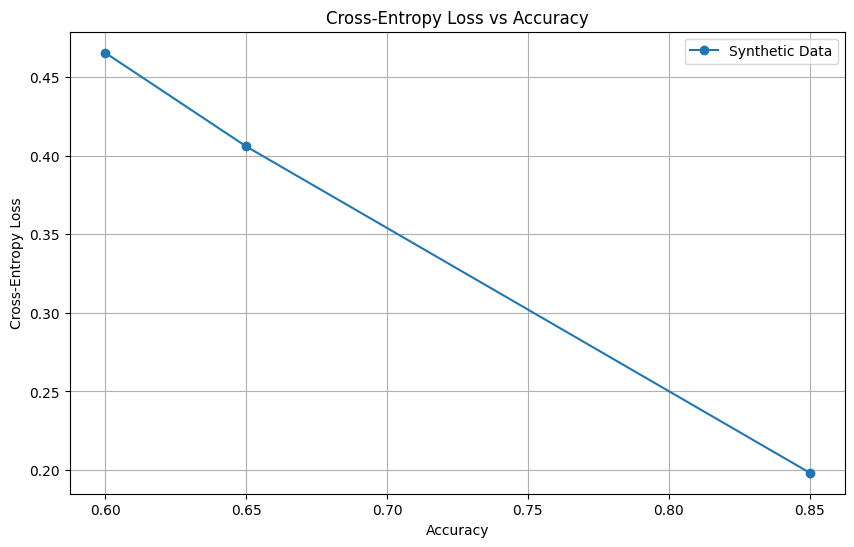

In [3]:
# Hint: not all right and wrong answers are created equally
np.random.seed(42)

y_true = np.random.randint(0, 2, 20)
# print(type(y_true))

# Set 1: High cross-entropy, low accuracy
pred_1 = [0.00, 0.059, 0.693, 0.045, 0.033, 0.966, 0.093, 0.275, 0.187, 0.915, 0.374, 0.019, 0.085, 0.134, 0.792, 0.617, 0.96, 0.736, 0.649, 0.002]
# convert to numpy array
predictions_1 = np.array(pred_1)

# Set 2: Medium cross-entropy, medium accuracy
pred_2 = [0.404, 0.039, 1.0, 0.665, 0.5, 0.469, 0.405, 0.005, 0.872, 0.987, 0.255, 0.389, 0.109, 0.004, 0.097, 0.106, 0.532, 0.406, 0.787, 0.223]
predictions_2 = np.array(pred_2)

# Set 3: Low cross-entropy, high accuracy
pred_3 = [0.015, 0.245, 0.001, 0.827, 0.067, 0.561, 0.903, 0.27, 0.701, 0.966, 0.06, 0.399, 0.883, 0.199, 0.357, 0.15, 0.992, 0.962, 0.002, 0.894]
predictions_3 = np.array(pred_3)

# Calculate cross-entropy and accuracy for each set
ce_1 = cross_entropy(predictions_1, y_true)
acc_1 = accuracy_score(y_true, predictions_1.round())

ce_2 = cross_entropy(predictions_2, y_true)
acc_2 = accuracy_score(y_true, predictions_2.round())

ce_3 = cross_entropy(predictions_3, y_true)
acc_3 = accuracy_score(y_true, predictions_3.round())

# Plotting
cross_entropies = [ce_1, ce_2, ce_3]
accuracies = [acc_1, acc_2, acc_3]

#cross_entropies = [ce_1, ce_2]
#accuracies = [acc_1, acc_2]

plt.figure(figsize=(10, 6))
plt.plot(accuracies, cross_entropies, 'o-', label='Synthetic Data')
plt.xlabel('Accuracy')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Accuracy')

plt.legend()
plt.grid(True)
plt.show()

# Problem 1: Cross Validation


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Part 1: Generate some data
 - Generate data with 1024 points and 10 features.
 - Create targets that are linear combinations of the 10 features and add some noise.
 - Split the data into train/test 80/20 percent.

In [201]:
# Generate some data
# Set a seed for reproducibility
np.random.seed(42)

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 0, 2, 0, 4, 0, 0])  # notice, there are zeros!
noise_amplitude = 5

# num_variables = ...
num_variables = coefs.shape[0]
print(coefs.shape[0])
print(num_variables)

# x = ...
# y = ...
x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)
#print(x)
#print(y)
print(x.shape, y.shape)

# x_train, x_test = ...
# y_train, y_test = ...
x_train_part1, x_test_part1, y_train_part1, y_test_part1 = train_test_split(x, y, random_state=104, test_size=0.20, shuffle=True) 
print(x_train_part1.shape, x_test_part1.shape, y_train_part1.shape, y_test_part1.shape)

del x, y

10
10
(1024, 10) (1024,)
(819, 10) (205, 10) (819,) (205,)


### Part 2: cross validation
Here we will cross validate our data to find the best set of parameters for `Lasso` regression. We will tune the regularization strength (`alpha`) and whether we fit an intercept to the data.
 - For each set of parameters find fit an estimator
 - Calculate the mean squared error on the test set
 - store the results (both the MSE and the parameters) so we can do analysis later

In [202]:
# alphas = # make a list of alphas here
# fit_intercepts = # make a list of the two values for `fit_intercept here`
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_intercept': [True, False]
}

# for all possible combinations, compute necessary metrics
# Initialize the Lasso model
lasso = Lasso()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(x_train_part1, y_train_part1)

# Get the best parameters and the corresponding MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Store the results for analysis
results = pd.DataFrame(grid_search.cv_results_)

Best parameters: {'alpha': 0.1, 'fit_intercept': False}
Best MSE: 2.386309036168309


### Part 3: Analysis
 - for each value of `fit_intercept` plot the `MSE` and `r2` scores as a function of alpha.
 - What is the overall best combination of parameters

In [203]:
# Calculate R2 scores
# Ensure 'mean_test_r2' column is added to the results DataFrame
results['mean_test_r2'] = results.apply(
    lambda row: r2_score(y_test_part1, grid_search.estimator.set_params(**row['params']).fit(x_train_part1, y_train_part1).predict(x_test_part1)),
    axis=1
)

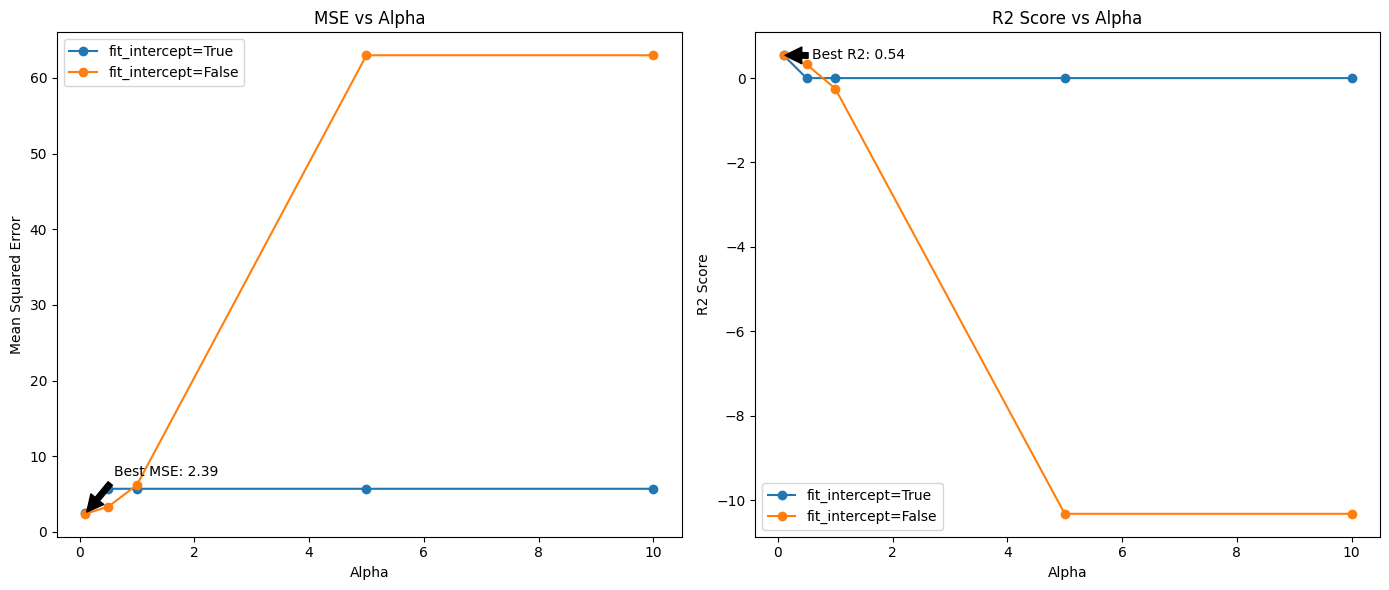

<Figure size 640x480 with 0 Axes>

Overall best parameters: {'alpha': 0.1, 'fit_intercept': False}


In [204]:
# Separate results based on fit_intercept
results_true = results[results['param_fit_intercept'] == True]
results_false = results[results['param_fit_intercept'] == False]

# Plot MSE for each value of fit_intercept
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(results_true['param_alpha'], -results_true['mean_test_score'], label='fit_intercept=True', marker='o')
plt.plot(results_false['param_alpha'], -results_false['mean_test_score'], label='fit_intercept=False', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')
plt.legend()

# Highlight the best MSE
best_mse_row = results.loc[results['mean_test_score'].idxmax()]
plt.annotate(f"Best MSE: {best_mse:.2f}", 
             xy=(best_mse_row['param_alpha'], -best_mse_row['mean_test_score']), 
             xytext=(best_mse_row['param_alpha'] + 0.5, -best_mse_row['mean_test_score'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plot R2 for each value of fit_intercept
plt.subplot(1, 2, 2)
plt.plot(results_true['param_alpha'], results_true['mean_test_r2'], label='fit_intercept=True', marker='o')
plt.plot(results_false['param_alpha'], results_false['mean_test_r2'], label='fit_intercept=False', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha')
plt.legend()

# Highlight the best R2
best_r2_row = results.loc[results['mean_test_r2'].idxmax()]
plt.annotate(f"Best R2: {best_r2_row['mean_test_r2']:.2f}", 
             xy=(best_r2_row['param_alpha'], best_r2_row['mean_test_r2']), 
             xytext=(best_r2_row['param_alpha'] + 0.5, best_r2_row['mean_test_r2'] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# Overall best combination of parameters
print(f"Overall best parameters: {best_params}")

# Problem 2: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [205]:
# Set seed for reproducibility
np.random.seed(42)

# Generate some data
num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = 0.05

num_variables = coefs.shape[0]
print(num_variables)

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)
print(x.shape, y.shape)

# your code here,
# split data into x_train, x_test, y_train, y_test
x_train_part2, x_test_part2, y_train_part2, y_test_part2 = train_test_split(x, y, random_state=104, test_size=0.20, shuffle=True) # 20% of all data is test data

# split training data into training and validation for hyperparameter tuning in Keras
x_train_part2, x_valid_part2, y_train_part2, y_valid_part2 = train_test_split(x_train_part2, y_train_part2, random_state=42, test_size=0.20, shuffle=True) # 20% of training data is validation data

print(x_train_part2.shape, x_valid_part2.shape, x_test_part2.shape, y_train_part2.shape, y_valid_part2.shape, y_test_part2.shape)

7
(1024, 7) (1024,)
(655, 7) (164, 7) (205, 7) (655,) (164,) (205,)


In [208]:
# fit linear regression here and calculate MSE
# put code here
# Fit linear regression model
model = LinearRegression()
model.fit(x_train_part2, y_train_part2)

# Predict on test set
y_pred_skllearn = model.predict(x_test_part2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_part2, y_pred_sklearn)
print(f"Mean Squared Error: {mse}")

# Calculate R2 score
r2 = r2_score(y_test_part2, y_pred_sklearn)
print(f"R2 Score: {r2}")

Mean Squared Error: 0.00021379426338183837
R2 Score: 0.9999442783279098


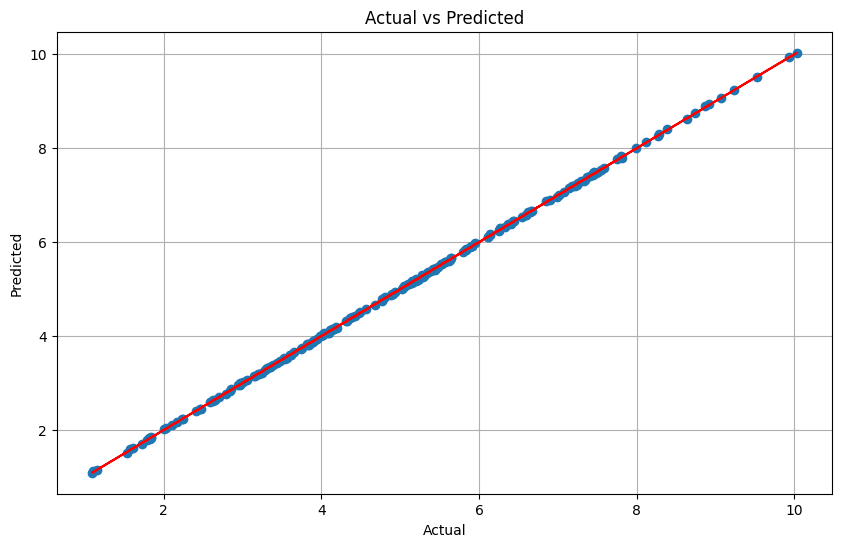

In [209]:
# Plot the regression model
plt.figure(figsize=(10, 6))
plt.plot(y_test_part2, y_pred_sklearn, 'o')
plt.plot(y_test_part2, y_test_part2, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [211]:
# Show that the coefficients are all close the "real" ones used to generate the data
# put code here
# Compare the coefficients
comparison_df_1 = pd.DataFrame({
    'Real Coefficients': coefs,
    'Estimated Coefficients': model.coef_
})

print(comparison_df_1)

   Real Coefficients  Estimated Coefficients
0              -1.20               -1.196352
1               5.00                4.999636
2               0.00               -0.000349
3               0.22                0.220911
4               2.00                2.001141
5               0.00               -0.000382
6               4.00                4.001557


In [212]:
# from IPython.display import SVG
from keras.utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras import backend as K

# def plot_model_in_notebook(model):
    # return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))

In [213]:
#K.clear_session()
# Now we will use keras to solve the same problem
#input_data = Input(shape=FIXME)
inputs = Input(shape=(x_train_part2.shape[1],))
print(x_train_part2.shape[1])
print(inputs)

# add model definition here
# build model here
#keras_lin_reg = Model(...)
#keras_lin_reg = Sequential()
#keras_lin_reg.add(inputs)
#keras_lin_reg.add(Dense(1, activation='linear'))
#keras_lin_reg.summary()

def create_linear_regression_model():
    K.clear_session()
    model = Sequential()
    inputs = Input(shape=(x_train_part2.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create and fit the model
keras_lin_reg = create_linear_regression_model()
keras_lin_reg.summary()

7
<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_1>


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

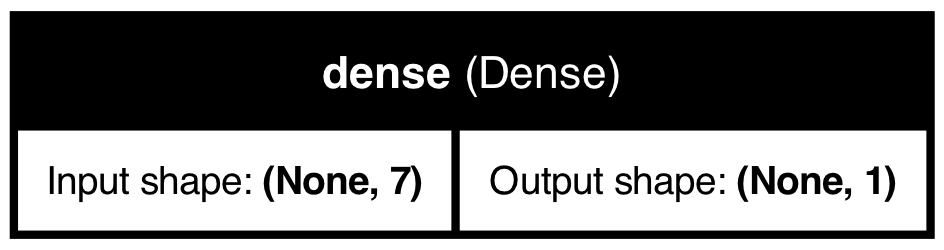

In [214]:
# don't forget to compile model here
# compiled in function above
# keras_lin_reg.compile(optimizer=Adam(), loss='mean_squared_error')
# keras_lin_reg.summary()

# plot the model
from IPython.display import Image
from keras.utils import plot_model
import pydot

plot_model(keras_lin_reg, show_shapes=True, show_layer_names=True, to_file='keras_lin_model.png')
Image('keras_lin_model.png')


## How many parameters does the model have?
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [215]:
# Calculate the number of parameters explicitly
input_shape = x_train_part2.shape[1] # data has 7 features
output_shape = 1
num_weights = input_shape * output_shape
num_biases = output_shape # here the number of biases matches the number of outputs because we have a single node
total_params = num_weights + num_biases

print(f"Calculated number of parameters: {total_params}")

# Verify with model.count_params()
print(f"Number of parameters from model.count_params(): {keras_lin_reg.count_params()}")

Calculated number of parameters: 8
Number of parameters from model.count_params(): 8


## Fit the model and calculate the MSE

Epoch 1/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5749 - val_loss: 19.9302
Epoch 2/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.6123 - val_loss: 19.1621
Epoch 3/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 19.2574 - val_loss: 18.4173
Epoch 4/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9571 - val_loss: 17.6983
Epoch 5/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 17.7707 - val_loss: 17.0168
Epoch 6/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 17.3202 - val_loss: 16.3436
Epoch 7/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 16.8174 - val_loss: 15.7062
Epoch 8/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 15.7772 - val_loss: 15.0873
Epoch 9/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.3354 - val_loss: 14.4874
Epoch 10/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.0083 - val_loss: 13.9089
Epoch 11/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.8466 - val_loss: 13.3696
Epoch 12/2000
21/21 

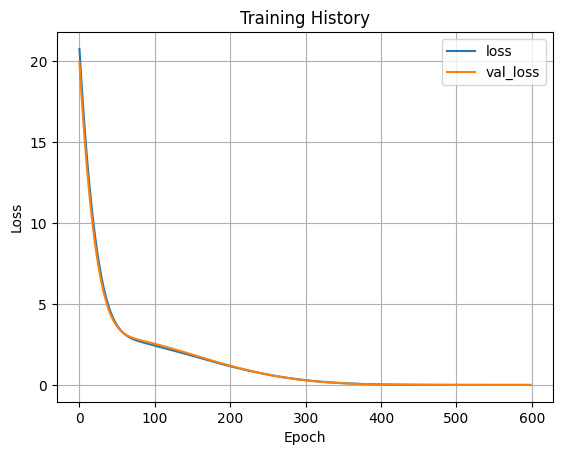

In [216]:
# https://medium.com/@sanjay_dutta/callbacks-in-keras-enhancing-your-model-training-workflow-04c07c7d659b
# https://keras.io/api/callbacks/
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_lin_reg_best = create_linear_regression_model()
checkpoint_cb = ModelCheckpoint("keras_linear.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
history = keras_lin_reg_best.fit(x_train_part2, y_train_part2, epochs=2000, validation_data=(x_valid_part2, y_valid_part2), callbacks=[checkpoint_cb, early_stopping_cb])

# Plot the training history
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [217]:
# Predict on the test set
y_pred_keras = keras_lin_reg_best.predict(x_test_part2)

# Calculate the Mean Squared Error
mse_keras = mean_squared_error(y_test_part2, y_pred_keras)
print(f"Mean Squared Error (Keras): {mse_keras}")

# Calculate the R2 score
r2_keras = r2_score(y_test_part2, y_pred_keras)
print(f"R2 Score (Keras): {r2_keras}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (Keras): 0.00021288654309473338
R2 Score (Keras): 0.9999445149090573


## get the coefficients and compare them to the real coefficients

In [218]:
# Get the coefficients from the Keras model
keras_coefs_lin = keras_lin_reg_best.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_lin = pd.DataFrame({
    'Real Coefficients': coefs,
    'Keras Coefficients': keras_coefs_lin
})

print(comparison_df_lin)

# 

   Real Coefficients  Keras Coefficients
0              -1.20           -1.198565
1               5.00            4.996717
2               0.00           -0.002783
3               0.22            0.218760
4               2.00            1.998897
5               0.00           -0.002437
6               4.00            3.998901


## Now we will add some regularization

In [219]:
# K.clear_session()
from tensorflow.keras.regularizers import l1_l2

def create_ridge_regression_model():
    K.clear_session()
    ridge_regularizer = l1_l2(l1=0, l2=.1)
    model = Sequential()
    inputs = Input(shape=(x_train_part2.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear', kernel_regularizer=ridge_regularizer))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create and fit the model
keras_lin_reg_ridge = create_ridge_regression_model()
keras_lin_reg_ridge.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6837 - val_loss: 20.0120
Epoch 2/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 20.8502 - val_loss: 19.2375
Epoch 3/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9484 - val_loss: 18.4996
Epoch 4/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 17.8477 - val_loss: 17.7809
Epoch 5/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 17.3326 - val_loss: 17.0894
Epoch 6/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 17.2874 - val_loss: 16.4214
Epoch 7/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 16.2583 - val_loss: 15.7828
Epoch 8/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 15.2758 - val_loss: 15.1688
Epoch 9/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 14.6022 - val_loss: 14.5723
Epoch 10/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 13.6234 - val_loss: 14.0082
Epoch 11/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 13.6975 - val_loss: 13.4526
Epoch 12/200

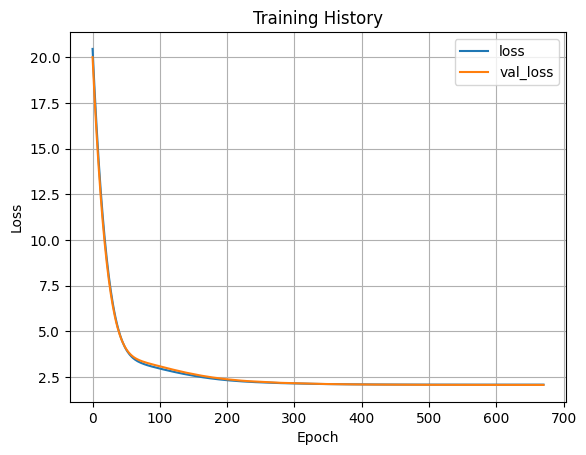

In [220]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_lin_reg_ridge_best = create_ridge_regression_model()
checkpoint_cb_ridge = ModelCheckpoint("keras_ridge.keras", save_best_only=True)
early_stopping_cb_ridge = EarlyStopping(patience=10, restore_best_weights=True)
history_ridge = keras_lin_reg_ridge_best.fit(x_train_part2, y_train_part2, epochs=2000, validation_data=(x_valid_part2, y_valid_part2), callbacks=[checkpoint_cb_ridge, early_stopping_cb_ridge])

# Plot the training history
history_df_ridge = pd.DataFrame(history_ridge.history)
history_df_ridge[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [221]:
# Predict on the test set
y_pred_keras_ridge = keras_lin_reg_ridge_best.predict(x_test_part2)

# Calculate the Mean Squared Error
mse_keras_ridge = mean_squared_error(y_test_part2, y_pred_keras_ridge)
print(f"Mean Squared Error (Keras - Ridge): {mse_keras_ridge}")

# Calculate the R2 score
r2_keras_ridge = r2_score(y_test_part2, y_pred_keras_ridge)
print(f"R2 Score (Keras): {r2_keras_ridge}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (Keras - Ridge): 1.173136201477569
R2 Score (Keras): 0.6942429151189455


In [222]:
# find the coefficients and compare them to the real ones
# keras_ridge_coefs = ....

# Get the coefficients from the Keras model
keras_ridge_coefs = keras_lin_reg_ridge_best.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_ridge_keras = pd.DataFrame({
    'Real Coefficients': coefs,
    'Keras Ridge Coefficients': keras_ridge_coefs
})

print(comparison_df_ridge_keras)

# pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

   Real Coefficients  Keras Ridge Coefficients
0              -1.20                 -0.497396
1               5.00                  2.250587
2               0.00                 -0.011148
3               0.22                  0.104351
4               2.00                  0.918955
5               0.00                  0.028441
6               4.00                  1.774384


In [223]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.1)
ridge.fit(x_train_part2, y_train_part2)
print(pd.Series(ridge.coef_, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients')))

# Predict on test set
y_pred_sk_ridge = ridge.predict(x_test_part2)

# Calculate Mean Squared Error
mse_sk_ridge = mean_squared_error(y_test_part2, y_pred_sk_ridge)
print(f"Mean Squared Error: {mse_sk_ridge}")

# Calculate R2 score
r2_sk_ridge = r2_score(y_test_part2, y_pred_sk_ridge)
print(f"R2 Score: {r2_sk_ridge}")

   ridge coefficients  real coefficients
0           -1.193898              -1.20
1            4.990248               5.00
2           -0.000478               0.00
3            0.220468               0.22
4            1.997487               2.00
5           -0.000218               0.00
6            3.993827               4.00
Mean Squared Error: 0.00022030135013225547
R2 Score: 0.9999425823714868


In [224]:
# compare coefficients from various methods
pd.concat([
    pd.Series(coefs, name='real coefs'),
    pd.Series(ridge.coef_, name='sklearn ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs')
], axis=1)

,real coefs,sklearn ridge coefs,keras L2 coefs
0,-1.20,-1.193898,-0.497396
1,5.00,4.990248,2.250587
2,0.00,-0.000478,-0.011148
3,0.22,0.220468,0.104351
4,2.00,1.997487,0.918955
5,0.00,-0.000218,0.028441
6,4.00,3.993827,1.774384


## In fact, given the zero coefficients, LASSO might have been a better model.
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [225]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with a chosen alpha value
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(x_train_part2, y_train_part2)

# Store the coefficients
lasso_coefs = lasso.coef_

print(pd.Series(lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients')))

# Predict on test set
y_pred_sk_lasso = lasso.predict(x_test_part2)

# Calculate Mean Squared Error
mse_sk_lasso = mean_squared_error(y_test_part2, y_pred_sk_lasso)
print(f"Mean Squared Error: {mse_sk_lasso}")

# Calculate R2 score
r2_sk_lasso = r2_score(y_test_part2, y_pred_sk_lasso)
print(f"R2 Score: {r2_sk_lasso}")


   lasso coefficients  real coefficients
0           -0.000000              -1.20
1            3.724232               5.00
2           -0.000000               0.00
3            0.000000               0.22
4            0.793313               2.00
5           -0.000000               0.00
6            2.760404               4.00
Mean Squared Error: 0.5393829673535838
R2 Score: 0.859419423316059


In [226]:
# K.clear_session()
from tensorflow.keras.regularizers import l1_l2

def create_lasso_regression_model():
    K.clear_session()
    lasso_regularizer = l1_l2(l1=0.1, l2=0)
    model = Sequential()
    inputs = Input(shape=(x_train_part2.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear', kernel_regularizer=lasso_regularizer))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create and fit the model
keras_lin_reg_lasso = create_lasso_regression_model()
keras_lin_reg_lasso.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.8880 - val_loss: 27.2170
Epoch 2/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 28.0387 - val_loss: 26.2918
Epoch 3/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.0273 - val_loss: 25.3920
Epoch 4/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.1570 - val_loss: 24.5210
Epoch 5/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 24.4478 - val_loss: 23.6773
Epoch 6/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1719 - val_loss: 22.8597
Epoch 7/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5955 - val_loss: 22.0741
Epoch 8/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8980 - val_loss: 21.2997
Epoch 9/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5041 - val_loss: 20.5602
Epoch 10/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4193 - val_loss: 19.8350
Epoch 11/2000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.0079 - val_loss: 19.1379
Epoch 12/2000
21/21 ━━━━━━

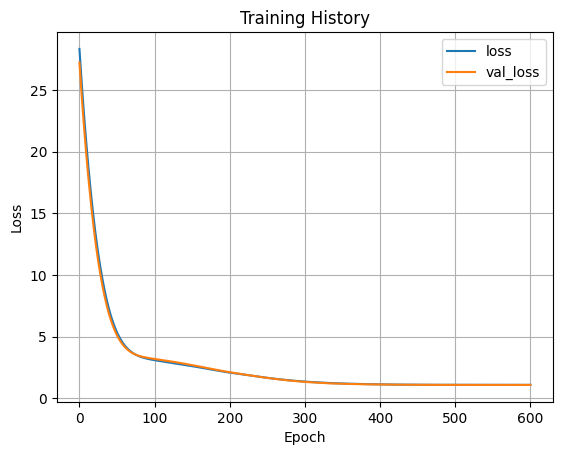

In [227]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_lin_reg_lasso_best = create_lasso_regression_model()
checkpoint_cb_lasso = ModelCheckpoint("keras_lasso.keras", save_best_only=True)
early_stopping_cb_lasso = EarlyStopping(patience=10, restore_best_weights=True)
history_lasso = keras_lin_reg_lasso_best.fit(x_train_part2, y_train_part2, epochs=2000, validation_data=(x_valid_part2, y_valid_part2), callbacks=[checkpoint_cb_lasso, early_stopping_cb_lasso])

# Plot the training history
history_df_lasso = pd.DataFrame(history_lasso.history)
history_df_lasso[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [317]:
# Predict on the test set
y_pred_keras_lasso = keras_lin_reg_lasso_best.predict(x_test_part2)

# Calculate the Mean Squared Error
mse_keras_lasso = mean_squared_error(y_test_part2, y_pred_keras_lasso)
print(f"Mean Squared Error (Keras - Lasso): {mse_keras_lasso}")

# Calculate the R2 score
r2_keras_lasso = r2_score(y_test_part2, y_pred_keras_lasso)
print(f"R2 Score (Keras): {r2_keras_lasso}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Mean Squared Error (Keras - Lasso): 0.14582492067565597
R2 Score (Keras): 0.9619933281466874


In [229]:
# Get the coefficients from the Keras model
keras_lasso_coefs = keras_lin_reg_lasso_best.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_lasso_keras = pd.DataFrame({
    'Real Coefficients': coefs,
    'Keras LASSO Coefficients': keras_lasso_coefs
})

print(comparison_df_lasso_keras)

   Real Coefficients  Keras LASSO Coefficients
0              -1.20                 -0.604784
1               5.00                  4.331120
2               0.00                  0.000167
3               0.22                  0.000070
4               2.00                  1.368316
5               0.00                  0.000156
6               4.00                  3.352664


In [230]:
# compare all the coefficients
pd.concat([
    pd.Series(coefs, name='real coefs'),
    pd.Series(model.coef_, name='ols coefs'),
    pd.Series(ridge.coef_, name='sklearn ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso_model.coef_, name='sklearn lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
], axis=1)

,real coefs,ols coefs,sklearn ridge coefs,keras L2 coefs,sklean lasso coefs,keras L1 coefs
0,-1.20,-1.196352,-1.193898,-0.497396,-0.000000,-0.604784
1,5.00,4.999636,4.990248,2.250587,3.724232,4.331120
2,0.00,-0.000349,-0.000478,-0.011148,-0.000000,0.000167
3,0.22,0.220911,0.220468,0.104351,0.000000,0.000070
4,2.00,2.001141,1.997487,0.918955,0.793313,1.368316
5,0.00,-0.000382,-0.000218,0.028441,-0.000000,0.000156
6,4.00,4.001557,3.993827,1.774384,2.760404,3.352664


In [231]:
# Compare all the R2 scores
pd.Series({
    'OLS': r2,
    'Ridge (sklearn)': r2_sk_ridge,
    'Ridge (keras)': r2_keras_ridge,
    'Lasso (sklearn)': r2_sk_lasso,
    'Lasso (keras)': r2_keras_lasso
}, name='R2 Scores')


OLS                0.999944
Ridge (sklearn)    0.999943
Ridge (keras)      0.694243
Lasso (sklearn)    0.859419
Lasso (keras)      0.961993
Name: R2 Scores, dtype: float64

In [232]:
# Compare all the MSE
pd.Series({
    'OLS': mse,
    'Ridge (sklearn)': mse_sk_ridge,
    'Ridge (keras)': mse_keras_ridge,
    'Lasso (sklearn)': mse_sk_lasso,
    'Lasso (keras)': mse_keras_lasso
}, name='MSE Scores')

OLS                0.000214
Ridge (sklearn)    0.000220
Ridge (keras)      1.173136
Lasso (sklearn)    0.539383
Lasso (keras)      0.145825
Name: MSE Scores, dtype: float64

## Comment on the results

OLS and Ridge (sklearn) performed best in terms of R2 scores, indicating that these models fit the data very well. OLS performed the best in terms of MSE, suggesting that it has the lowest error in predictions. While Ridge (keras) showed relatively poor performance based on both R2 and MSE, because the coefficients of the L2 Ridge (keras) model had the highest weight penalty, and were therefore reduced the most out of all models.

The coefficients of the OLS model were very close to the actual coefficients, as expected. The small amount of noise amplitude (0.05) added to the data allowed the standard linear model to fit the data very well. Ridge coefficients from sklearn were very close to the original unregularized result. Questions remain as to why the L2 sklearn produced very different results than the L2 keras model, when both were provided the same alpha (0.1). The coefficient results of both L1 regularization Lasso models seem reasonable, with the sklearn model (the reverse of the L2 result) more heavily penalizing large coefficients.

While this exercise was useful in seeing the slight nuances between different models, the extremely low amount of noise introduced into the synthetic data means these results would likely not be the same on any real-world dataset.

# Problem 3: Custom Loss Functions
### In this problem we will explore the use of custom loss function to better capture desired behavior in a model.
### In particular, we will examine the tradeoff between false positives and true positives

In [233]:
import numpy as np
import pandas as pd

# many of these to be removed
# Insert necessary imports here
from keras.datasets import mnist
from keras.utils import to_categorical

## Part 0: Data preparation
 - ### Load the `mnist` data and subset the data only to the classes `4` and `9`
 - ### This way we have a binary classification task for simplicity

In [234]:
from keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    # insert code here:
    # Create a boolean mask for values of y that are either 4 or 9
    mask = np.isin(y, [4, 9])
    
    # new_x should be x where y is either 4 or 9
    new_x = x[mask]
    
    # new_y should be True if y == 4 and False if y == 9
    new_y = (y[mask] == 4)
    
    return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

In [235]:
print(x_train.shape)
print(x_test.shape)

(11791, 784)
(1991, 784)


In [236]:
print(y_train.shape)
print(y_test.shape)

(11791,)
(1991,)


In [237]:
# Rename the variables as to not overwrite the previous ones
x_train_mnist = x_train
x_test_mnist = x_test
y_train_mnist = y_train
y_test_mnist = y_test

del x_train, x_test, y_train, y_test

### Create validation set from training set for early stopping in Keras

In [238]:
# Split training data into training and validation
from sklearn.model_selection import train_test_split

# split training data into training and validation for hyperparameter tuning in Keras
x_train_mnist, x_valid_mnist, y_train_mnist, y_valid_mnist = train_test_split(x_train_mnist, y_train_mnist, random_state=42, test_size=0.20, shuffle=True) # 20% of training data is validation data

# print the shapes to verify
print(x_train_mnist.shape, x_valid_mnist.shape, x_test_mnist.shape, y_train_mnist.shape, y_valid_mnist.shape, y_test_mnist.shape)

(9432, 784) (2359, 784) (1991, 784) (9432,) (2359,) (1991,)


## Part 1: fit logistic regression in `scikit-learn` and compute the true positive and false positive rates

In [239]:
%%time
# insert code here

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train_mnist, y_train_mnist)

# Predict on test set
y_pred_sklearn_mnist = log_reg.predict(x_test_mnist)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_mnist, y_pred_sklearn_mnist).ravel()

# Calculate true positive rate, false positive, and false negative rates
sklearn_tpr = tp / (tp + fn)
sklearn_fpr = fp / (fp + tn)
sklearn_fnr = fn / (fn + tp)

print('True Positive Rate (TPR): {:.3f}'.format(sklearn_tpr))
print('False Positive Rate (FPR): {:.3f}'.format(sklearn_fpr))
print('False Negative Rate (FNR): {:.3f}'.format(sklearn_fnr))

True Positive Rate (TPR): 0.974
False Positive Rate (FPR): 0.027
False Negative Rate (FNR): 0.026


## Part 2: A custom loss function
Write a function that returns a custom loss function.<br>
As a shortcut, we can modify the loss function to be
$J(\theta )$=`regular crossentropy `  $\times$  $\alpha$

where
 - $\alpha=$ 1 + `weight_factor` (a number greater than 0) for the positive class (`y=1`)
 - $\alpha=$ `1` for the negative class (`y=0`)

Like this we can over weight how much we care about positive examples.

$ \\ $
Function
Inputs:
 - `weight_factor`: the multiplicative factor for how much to weight errors in the `1` class over `0`

Output:
 - a function that has inputs `(y_true, y_pred)` that is a viable keras loss function.


In [241]:
import tensorflow as tf

def get_loss_function(weight_factor):
    def my_cross_entropy(y_true, y_pred):
        # Calculate the regular cross-entropy loss
        cross_entropy_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        
        # Calculate the weights: 1 + weight_factor for positive class, 1 for negative class
        weights = 1 + weight_factor * y_true
        
        # Apply the weights to the cross-entropy loss
        weighted_loss = cross_entropy_loss * weights
        
        # Return the mean loss
        return tf.reduce_mean(weighted_loss)
    
    return my_cross_entropy

## Part 3: Fit Models with Different `weight_factors`
Steps
 - For values in `np.linspace(0, 20, 50)` fit logistic regression in keras.
 - For each model compute the true positive and false positive rate
 - Make a plot of true positives and false positives as a function of `weight_factor`
 - Make a plot of true positives as a function of false positives

In [242]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Function to create and compile a logistic regression model with a custom loss function
def custom_loss_keras(weight_factor):
    K.clear_session()
    model = Sequential()
    digit_input = Input(shape=(x_train_mnist.shape[1],), name='digit_input')
    model.add(digit_input)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss=get_loss_function(weight_factor))
    return model

# Dictionary to store results
custom_loss_results = {'weight_factor': [], 'custom_loss_tpr': [], 'custom_loss_fpr': [], 'best_epoch': []}

# Fit models with different weight factors and compute metrics
for wt in np.linspace(0, 20, 50):
    custom_loss = custom_loss_keras(wt)
    
    #implement early stopping - train on optimal number of epochs
    early_stopping_custom_loss = EarlyStopping(patience=10, restore_best_weights=True)
    history_custom_loss = custom_loss.fit(x_train_mnist, y_train_mnist, epochs=1000, validation_data=(x_valid_mnist, y_valid_mnist), callbacks=[early_stopping_custom_loss])

    #custom_loss.fit(x_train, y_train, epochs=600, verbose=0)
    
    y_pred_keras_mnist = custom_loss.predict(x_test_mnist).round()
    
    # Get epoch number with the lowest validation loss
    best_epoch = np.argmin(history_custom_loss.history['val_loss']) + 1
    
    tn, fp, fn, tp = confusion_matrix(y_test_mnist, y_pred_keras_mnist).ravel()
    
    custom_loss_tpr = tp / (tp + fn)
    custom_loss_fpr = fp / (fp + tn)
    
    custom_loss_results['weight_factor'].append(wt)
    custom_loss_results['custom_loss_tpr'].append(custom_loss_tpr)
    custom_loss_results['custom_loss_fpr'].append(custom_loss_fpr)
    custom_loss_results['best_epoch'].append(best_epoch)

# Convert results to DataFrame for plotting
custom_loss_df = pd.DataFrame(custom_loss_results)

Epoch 1/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.5158 - val_loss: 0.2555
Epoch 2/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.2357 - val_loss: 0.1792
Epoch 3/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1638 - val_loss: 0.1480
Epoch 4/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.1411 - val_loss: 0.1314
Epoch 5/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.1260 - val_loss: 0.1215
Epoch 6/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.1196 - val_loss: 0.1150
Epoch 7/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.1063 - val_loss: 0.1094
Epoch 8/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1050 - val_loss: 0.1064
Epoch 9/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.0977 - val_loss: 0.1031
Epoch 10/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0950 - val_loss: 0.1000
Epoch 11/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0981 - val_loss: 0.0979
Epoch 12

In [243]:
custom_loss_df.head()

,weight_factor,custom_loss_tpr,custom_loss_fpr,best_epoch
0,0.000000,0.973523,0.022795,40
1,0.408163,0.971487,0.020813,33
2,0.816327,0.969450,0.019822,33
3,1.224490,0.970468,0.021804,40
4,1.632653,0.971487,0.019822,40


In [244]:
# Show row where the fpr is the lowest
custom_loss_df.loc[custom_loss_df['custom_loss_fpr'].idxmin()]

weight_factor      15.102041
custom_loss_tpr     0.969450
custom_loss_fpr     0.018831
best_epoch         37.000000
Name: 37, dtype: float64

In [245]:
# Show row where the tpr is the highest
custom_loss_df.loc[custom_loss_df['custom_loss_tpr'].idxmax()]

weight_factor       7.755102
custom_loss_tpr     0.974542
custom_loss_fpr     0.024777
best_epoch         40.000000
Name: 19, dtype: float64

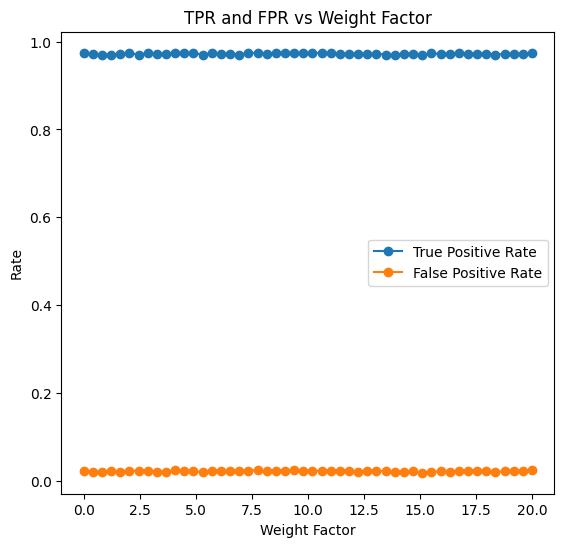

In [246]:
# put plotting code here
# true positive and false positives as a function of wt
# Plot true positives and false positives as a function of weight_factor
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(custom_loss_df['weight_factor'], custom_loss_df['custom_loss_tpr'], label='True Positive Rate', marker='o')
plt.plot(custom_loss_df['weight_factor'], custom_loss_df['custom_loss_fpr'], label='False Positive Rate', marker='o')
plt.xlabel('Weight Factor')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Weight Factor')
plt.legend()

# Export plot to file
plt.savefig('tpr_fpr_vs_weight_factor.png')

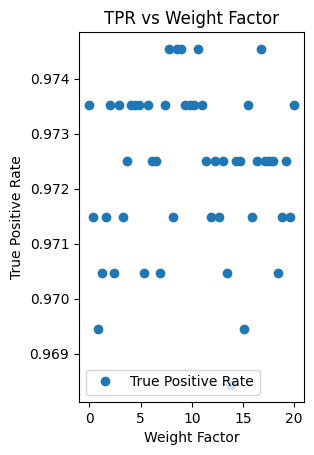

In [247]:
# Graph the true positive rate against the weight factor
plt.subplot(1, 2, 2)
plt.plot(custom_loss_df['weight_factor'], custom_loss_df['custom_loss_tpr'], label='True Positive Rate', marker='o', linewidth=0)
plt.xlabel('Weight Factor')
plt.ylabel('True Positive Rate')
plt.title('TPR vs Weight Factor')
plt.legend()
plt.show()


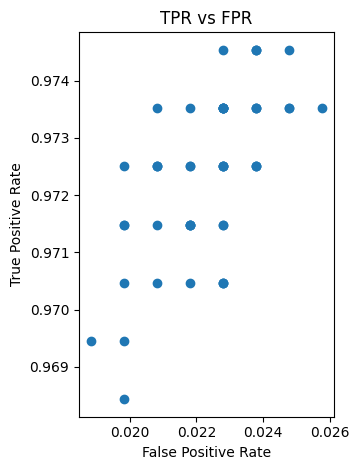

<Figure size 640x480 with 0 Axes>

In [248]:
# true positives as a function of false positives
# Plot true positives as a function of false positives
plt.subplot(1, 2, 2)
plt.plot(custom_loss_df['custom_loss_fpr'], custom_loss_df['custom_loss_tpr'], marker='o', linewidth=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TPR vs FPR')

plt.tight_layout()
plt.show()

# Export plot to file
plt.savefig('tpr_vs_fpr.png')

## Part 4: Thresholding vs Loss Function
What is the difference between using regular crossentropy and changing thresholds vs changing the loss function?<br>
Typically, we consider anything with a predicted probability of 0.5 or above to be a positive example. What if we change this number?

Steps:
 - Fit logistic regression in keras with the regular (crossentropy) loss function
 - Find the false positive and true positive rates as a function of the `threshold` for which we consider a positive example.
 - Make a plot of false positives as a function of true positives for this thresholding method.
 - On the same axes, plot the old curve of false positives as a function of true positives
 - Comment on what you find- what are the advantages and disadvantages of these two methods.

In [249]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [250]:
#K.clear_session()
# Fit logistic regression in keras with the regular (crossentropy) loss function
def create_crossentropy_model():
    K.clear_session()
    model = Sequential()
    digit_input = Input(shape=(x_train_mnist.shape[1],), name='digit_input')
    model.add(digit_input)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy')
    return model

digit_input = Input(shape=(x_train_mnist.shape[1],), name='digit_input')
print(digit_input.shape)

(None, 784)


In [197]:
# Create and fit the model
keras_ce_best = create_crossentropy_model()
keras_ce_best.fit(x_train_mnist, y_train_mnist, epochs=50, verbose=0)
keras_ce_best.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)

In [251]:
print(x_train_mnist.shape, y_train_mnist.shape)

(9432, 784) (9432,)


In [252]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_ce_best = create_crossentropy_model()
checkpoint_cb_ce = ModelCheckpoint("keras_crossentropy.keras", save_best_only=True)
early_stopping_cb_ce = EarlyStopping(patience=10, restore_best_weights=True)
history_ce = keras_ce_best.fit(x_train_mnist, y_train_mnist, epochs=1000, validation_data=(x_valid_mnist, y_valid_mnist), callbacks=[checkpoint_cb_ce, early_stopping_cb_ce])

Epoch 1/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.5156 - val_loss: 0.2579
Epoch 2/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.2305 - val_loss: 0.1820
Epoch 3/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.1704 - val_loss: 0.1496
Epoch 4/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.1441 - val_loss: 0.1338
Epoch 5/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.1276 - val_loss: 0.1226
Epoch 6/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.1120 - val_loss: 0.1158
Epoch 7/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.1017 - val_loss: 0.1109
Epoch 8/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.0971 - val_loss: 0.1063
Epoch 9/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.1000 - val_loss: 0.1038
Epoch 10/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.0964 - val_loss: 0.1010
Epoch 11/1000
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0880 - val_loss: 0.0991
Epoch 12

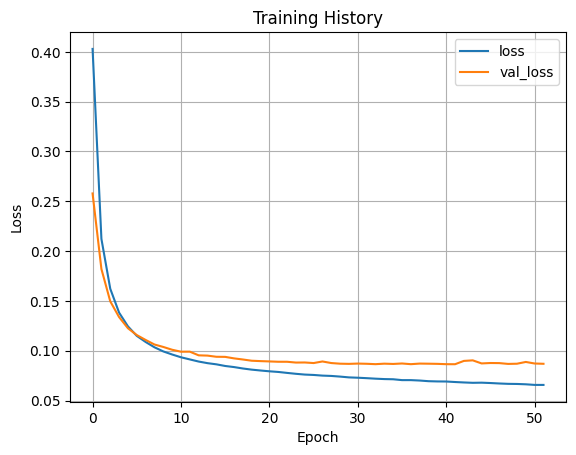

In [253]:
# Plot the training history
history_df_ce = pd.DataFrame(history_ce.history)
history_df_ce[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [260]:
#pred_proba = model.predict(x_test)
# Predict probabilities on the test set
y_pred_ce = keras_ce_best.predict(x_test_mnist)

# Print predictions and y_test together in a dataframe
print(pd.DataFrame({'y_test': y_test_mnist, 'y_pred': y_pred_ce.flatten()}))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
      y_test    y_pred
0       True  0.982289
1       True  0.995636
2      False  0.001125
3      False  0.018192
4      False  0.002107
...      ...       ...
1986    True  0.999962
1987    True  0.999446
1988    True  0.999545
1989   False  0.121053
1990    True  0.996249

[1991 rows x 2 columns]


In [269]:
def calculate_tpr_fpr(y_true, y_pred_proba, thresholds):
    tpr_list = []
    fpr_list = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return tpr_list, fpr_list

In [271]:
# Define thresholds
thresholds = np.linspace(0, 1, 50)
print(thresholds)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [273]:
# Calculate TPR and FPR for different thresholds
tpr_threshold, fpr_threshold = calculate_tpr_fpr(y_test_mnist, y_pred_ce, thresholds)

In [274]:
print(tpr_threshold)

[1.0, 0.9979633401221996, 0.9969450101832994, 0.9959266802443992, 0.9959266802443992, 0.994908350305499, 0.9938900203665988, 0.9918533604887984, 0.9918533604887984, 0.9898167006109979, 0.9887983706720977, 0.9877800407331976, 0.9857433808553971, 0.9857433808553971, 0.984725050916497, 0.984725050916497, 0.9816700610997964, 0.9816700610997964, 0.9806517311608961, 0.9775967413441955, 0.9765784114052953, 0.9755600814663951, 0.9735234215885947, 0.9735234215885947, 0.9735234215885947, 0.9725050916496945, 0.9694501018329938, 0.9663951120162932, 0.9643584521384929, 0.9633401221995926, 0.9633401221995926, 0.9592668024439919, 0.9592668024439919, 0.9562118126272913, 0.955193482688391, 0.9511201629327902, 0.9460285132382892, 0.9429735234215886, 0.9378818737270875, 0.9368635437881874, 0.9327902240325866, 0.9266802443991853, 0.9215885947046843, 0.9144602851323829, 0.8981670061099797, 0.8859470468431772, 0.8716904276985743, 0.8329938900203666, 0.7627291242362525, 0.024439918533604887]


In [275]:
print(fpr_threshold)

[1.0, 0.21605550049554015, 0.14172447968285432, 0.11793855302279485, 0.09613478691774034, 0.08622398414271557, 0.07730426164519326, 0.06739345887016848, 0.06342913776015857, 0.05649157581764123, 0.05450941526263627, 0.05153617443012884, 0.04658077304261645, 0.04261645193260654, 0.03964321110009911, 0.03468780971258672, 0.031714568880079286, 0.031714568880079286, 0.027750247770069375, 0.026759167492566897, 0.02576808721506442, 0.024777006937561942, 0.024777006937561942, 0.024777006937561942, 0.02180376610505451, 0.019821605550049554, 0.01684836471754212, 0.015857284440039643, 0.015857284440039643, 0.015857284440039643, 0.014866204162537165, 0.014866204162537165, 0.014866204162537165, 0.013875123885034688, 0.013875123885034688, 0.013875123885034688, 0.013875123885034688, 0.013875123885034688, 0.011892963330029732, 0.009910802775024777, 0.009910802775024777, 0.009910802775024777, 0.008919722497522299, 0.008919722497522299, 0.007928642220019821, 0.007928642220019821, 0.004955401387512388, 

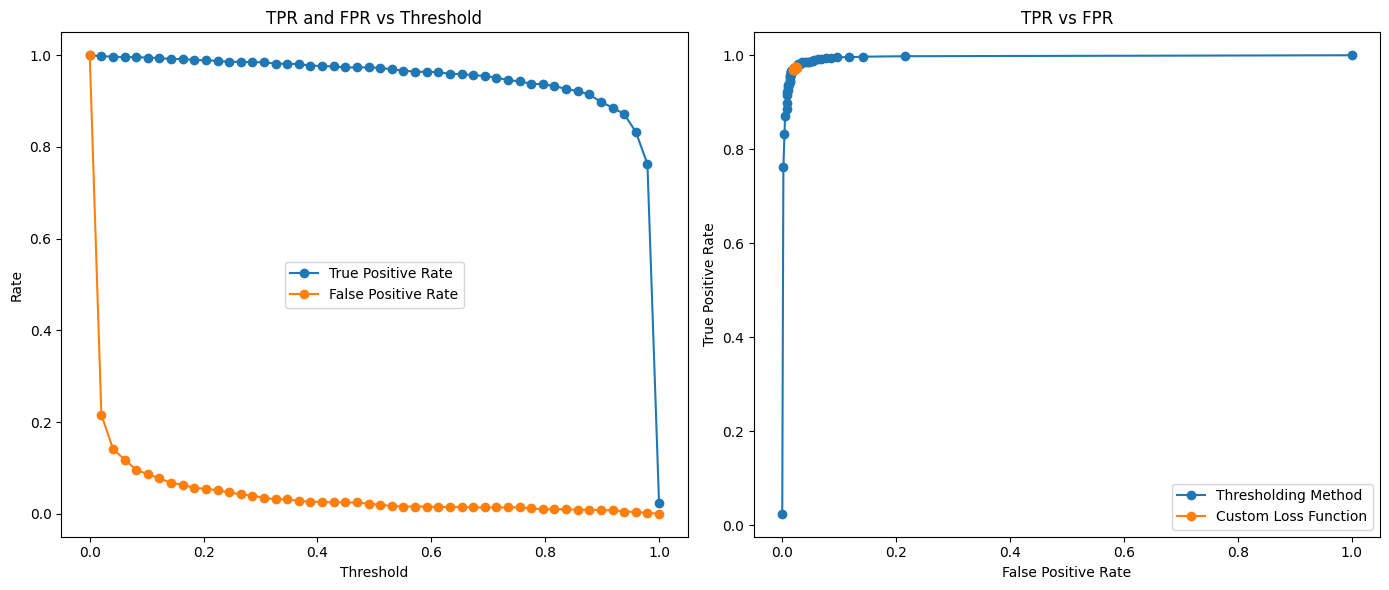

<Figure size 640x480 with 0 Axes>

In [276]:
# Plot TPR vs FPR for thresholding method
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, tpr_threshold, label='True Positive Rate', marker='o')
plt.plot(thresholds, fpr_threshold, label='False Positive Rate', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()

# Plot TPR vs FPR for thresholding method and compare with previous method
plt.subplot(1, 2, 2)
plt.plot(fpr_threshold, tpr_threshold, label='Thresholding Method', marker='o')
plt.plot(custom_loss_df['custom_loss_fpr'], custom_loss_df['custom_loss_tpr'], label='Custom Loss Function', marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TPR vs FPR')
plt.legend()

plt.tight_layout()
plt.show()

# Export plot to file
plt.savefig('tpr_fpr_vs_threshold.png')

### Comments

Thresholding is generally easier to manage and understand, but it does not change the intrinsic behavior of the model. On the other hand, changing the loss function can provide a higher level of flexibility for models that may better meet specific needs, but it requires more careful design and validation to ensure that the model generalizes well to new data. The ROC curve for the custom loss function in the above figure (in orange) is closer to the upper left corner, indicating better performance, with a high true positive rate while maintaining a low false positive rate.

It was also noted that varying the threshold allows for a much larger range of model performance. Adjusting the weight factors in the custom loss function had very little impact on the resulting TPR/FPR.

# Problem 4: Custom Regularization

In [278]:
import numpy as np
import pandas as pd

# many of these to be removed
# necessary imports here
import tensorflow as tf

In [279]:
np.random.seed(24)
n_points = 2048

x = np.vstack([np.random.randn(n_points) + ii for ii in np.arange(-3, 3)]).T
real_coefs = np.array([1.4, 0.9, .1, -3, 2.2, -1.3])
y = x.dot(real_coefs) + .5 * np.random.randn(n_points)

print(x.shape, y.shape)

(2048, 6) (2048,)


Text(0, 0.5, 'counts')

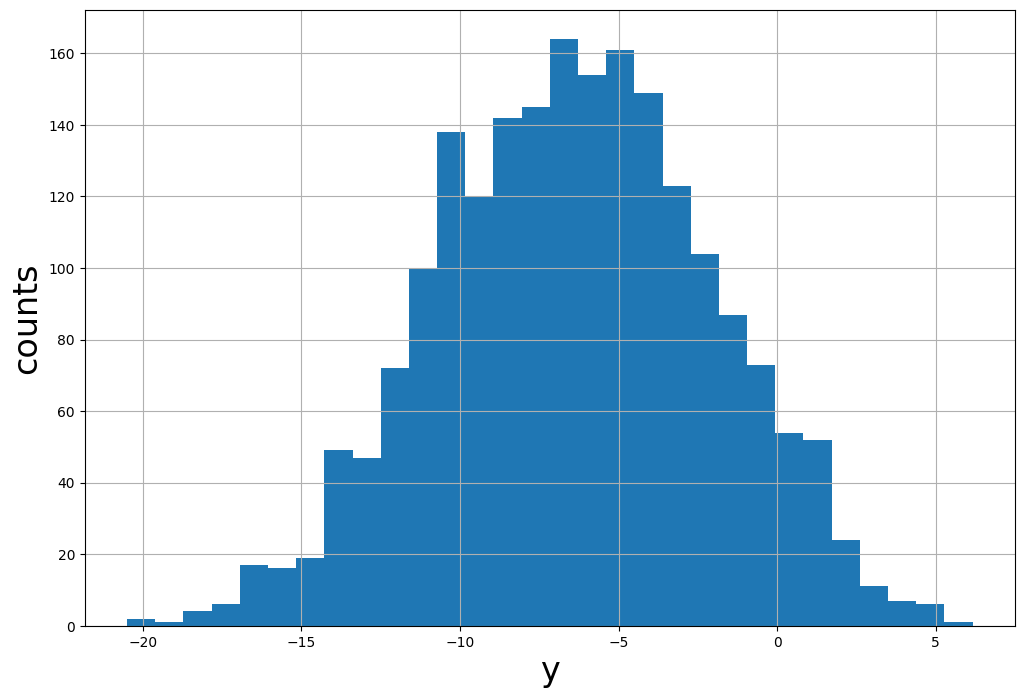

In [280]:
pd.Series(y).hist(bins=30, figsize=(12,8))
plt.xlabel('y', fontsize=24)
plt.ylabel('counts', fontsize=24)

## A new regularization
Sometimes, in the social science and in low-data situations a good rule of thumb is that instead of doing linear regression to find the coefficients, we can assume that all the coefficients are the same!

We will implement a variation on this by penalizing the `variance` of the coefficients, instead of the size.

__NOTE__: this is not a good thing to do in this situation- we have coefficients of different sign!

In this problem we will first solve linear regression with keras. Then we will add a custom regularizer to penalize the variance, and see what the effects are.

# $ \\ $
# $ \\ $
## Part 0: Solve the problem with no regularization
Steps:
 - Partition the data into train/test
 - Fit linear regression in keras with no regularization
 - Find the `mse` for the test set this model
 - Examine the coefficients and make sure they look correct

In [282]:
# partition the data into training, validation, and test sets
x_train_part4, x_test_part4, y_train_part4, y_test_part4 = train_test_split(x, y, random_state=104, test_size=0.20, shuffle=True) 
x_train_part4, x_valid_part4, y_train_part4, y_valid_part4 = train_test_split(x_train_part4, y_train_part4, random_state=42, test_size=0.20, shuffle=True)
print(x_train_part4.shape, x_valid_part4.shape, x_test_part4.shape, y_train_part4.shape, y_valid_part4.shape, y_test_part4.shape)

(1310, 6) (328, 6) (410, 6) (1310,) (328,) (410,)


In [284]:
# Define the model
def create_keras_lin_model_part4():
    K.clear_session()
    model = Sequential()
    inputs = Input(shape=(x_train_part4.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [287]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_lin_best_part4 = create_keras_lin_model_part4()
checkpoint_cb_part4 = ModelCheckpoint("keras_linear_part4.keras", save_best_only=True)
early_stopping_cb_part4 = EarlyStopping(patience=10, restore_best_weights=True)
history_part4 = keras_lin_best_part4.fit(x_train_part4, y_train_part4, epochs=1000, validation_data=(x_valid_part4, y_valid_part4), callbacks=[checkpoint_cb_part4, early_stopping_cb_part4])

Epoch 1/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.6843 - val_loss: 126.6883
Epoch 2/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 121.1941 - val_loss: 117.9799
Epoch 3/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 116.2110 - val_loss: 109.7259
Epoch 4/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 103.1028 - val_loss: 102.0281
Epoch 5/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 94.6479 - val_loss: 94.7272
Epoch 6/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 88.5916 - val_loss: 87.8834
Epoch 7/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 84.0482 - val_loss: 81.4058
Epoch 8/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 75.0226 - val_loss: 75.4003
Epoch 9/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.5700 - val_loss: 69.7406
Epoch 10/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 65.1844 - val_loss: 64.4835
Epoch 11/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 60.0624 - val_loss: 59.6157
Epoc

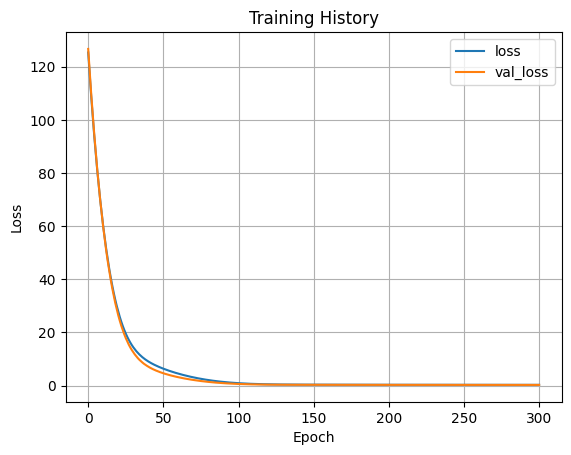

In [288]:
# Plot the training history
history_df_part4 = pd.DataFrame(history_part4.history)
history_df_part4[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [316]:
# Predict on the test set
y_pred_keras_part4 = keras_lin_best_part4.predict(x_test_part4)

# Calculate the Mean Squared Error
mse_keras_part4 = mean_squared_error(y_test_part4, y_pred_keras_part4)
print(f"Mean Squared Error (Keras): {mse_keras_part4}")

# Calculate the R2 score
r2_keras_part4 = r2_score(y_test_part4, y_pred_keras_part4)
print(f"R2 Score (Keras): {r2_keras_part4}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
Mean Squared Error (Keras): 0.25217591219253155
R2 Score (Keras): 0.9853205927817391


In [290]:
# examine coefs and make sure they look right
# Get the coefficients from the Keras model
keras_coefs_part4 = keras_lin_best_part4.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_part4 = pd.DataFrame({
    'Real Coefficients': real_coefs,
    'Keras Coefficients': keras_coefs_part4
})

print(comparison_df_part4)

   Real Coefficients  Keras Coefficients
0                1.4            1.382586
1                0.9            0.880271
2                0.1            0.105417
3               -3.0           -3.011130
4                2.2            2.189911
5               -1.3           -1.293944


## Part 1: Add Regularization
Steps:
 - Make a function that given a `weight_factor` returns a well-formed keras regularization function that penalizes the variance of coefficients by this factor.
 - Fit a model with this regularizer with a `weight_factor` of `1.0`.
 - Calculate the `mse` on the test set and examine the coefficients.

__Note__: the coefficients should be closer together. Are they?


In [292]:
class VarianceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight_factor):
        self.weight_factor = weight_factor

    def __call__(self, x):
        variance = tf.math.reduce_variance(x)
        return self.weight_factor * variance

    def get_config(self):
        return {'weight_factor': self.weight_factor}

# Define the model with custom regularizer
variance_regularizer = VarianceRegularizer(weight_factor=1.0)

In [294]:
def create_custom_reg():
    K.clear_session()
    model = Sequential()
    inputs = Input(shape=(x_train_part4.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear', kernel_regularizer=variance_regularizer))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [295]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_custom_reg = create_custom_reg()
checkpoint_cb_custom_reg = ModelCheckpoint("keras_custom_reg.keras", save_best_only=True)
early_stopping_cb_custom_reg = EarlyStopping(patience=10, restore_best_weights=True)
history_custom_reg = keras_custom_reg.fit(x_train_part4, y_train_part4, epochs=2000, validation_data=(x_valid_part4, y_valid_part4), callbacks=[checkpoint_cb_custom_reg, early_stopping_cb_custom_reg])

Epoch 1/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.4072 - val_loss: 44.0785
Epoch 2/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 42.1684 - val_loss: 39.7875
Epoch 3/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 37.9928 - val_loss: 35.9820
Epoch 4/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 34.1203 - val_loss: 32.6371
Epoch 5/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 29.9248 - val_loss: 29.6431
Epoch 6/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 30.7076 - val_loss: 27.0137
Epoch 7/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 27.5825 - val_loss: 24.7369
Epoch 8/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 23.6884 - val_loss: 22.7516
Epoch 9/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 23.2028 - val_loss: 21.0049
Epoch 10/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 20.8401 - val_loss: 19.5082
Epoch 11/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 19.2909 - val_loss: 18.1508
Epoch 12/2

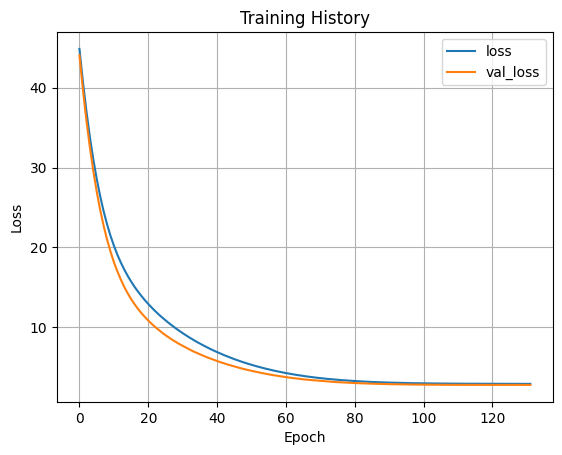

In [296]:
# Plot the training history
history_df_custom_reg = pd.DataFrame(history_custom_reg.history)
history_df_custom_reg[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [313]:
# Predict on the test set
y_pred_keras_custom_reg = keras_custom_reg.predict(x_test_part4)

# Calculate the Mean Squared Error
mse_keras_custom_reg = mean_squared_error(y_test_part4, y_pred_keras_custom_reg)
print(f"Mean Squared Error (Keras - Custom Reg): {mse_keras_custom_reg}")

# Calculate the R2 score
r2_keras_custom_reg = r2_score(y_test_part4, y_pred_keras_custom_reg)
print(f"R2 Score (Keras): {r2_keras_custom_reg}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
Mean Squared Error (Keras - Custom Reg): 0.6007878513513918
R2 Score (Keras): 0.965027549835776


In [312]:
# Get the coefficients from the Keras model
keras_custom_reg_coefs = keras_custom_reg.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_custom_reg = pd.DataFrame({
    'Real Coefficients': real_coefs,
    'Keras Custom Reg Coefficients': keras_custom_reg_coefs
})

print(comparison_df_custom_reg)

   Real Coefficients  Keras Custom Reg Coefficients
0                1.4                       1.173414
1                0.9                       0.775424
2                0.1                       0.084083
3               -3.0                      -2.548492
4                2.2                       1.906340
5               -1.3                      -1.187217


## Part 2: Turn up the Regularization
Steps
 - Repeat part 1 with the weight factor turned up to many times its initial value
 - Calculate the `mse` on the test set
 - Examine the coefficients and comment
 - Compare these results to the best constant guess for `y`.

In [306]:
K.clear_session()
# make and fit a model with MUCH more regularization
# Define the model with custom regularizer
variance_regularizer_big = VarianceRegularizer(weight_factor=100.0)

def create_custom_reg_big():
    K.clear_session()
    model = Sequential()
    inputs = Input(shape=(x_train_part4.shape[1],))
    model.add(inputs)
    model.add(Dense(1, activation='linear', kernel_regularizer=variance_regularizer_big))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [307]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use callbacks to stop training early if the loss on validation data does not decrease
keras_custom_reg_big = create_custom_reg_big()
checkpoint_cb_custom_reg_big = ModelCheckpoint("keras_custom_reg_big.keras", save_best_only=True)
early_stopping_cb_custom_reg_big = EarlyStopping(patience=10, restore_best_weights=True)
history_custom_reg_big = keras_custom_reg_big.fit(x_train_part4, y_train_part4, epochs=2000, validation_data=(x_valid_part4, y_valid_part4), callbacks=[checkpoint_cb_custom_reg_big, early_stopping_cb_custom_reg_big])

Epoch 1/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.1254 - val_loss: 88.1195
Epoch 2/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84.7167 - val_loss: 80.5278
Epoch 3/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 75.4664 - val_loss: 73.8260
Epoch 4/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 71.4488 - val_loss: 67.8672
Epoch 5/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.5006 - val_loss: 62.6841
Epoch 6/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 59.1220 - val_loss: 58.1250
Epoch 7/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.5040 - val_loss: 54.1362
Epoch 8/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 53.0515 - val_loss: 50.6531
Epoch 9/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 48.0866 - val_loss: 47.6089
Epoch 10/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 47.2603 - val_loss: 44.9454
Epoch 11/2000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 43.0120 - val_loss: 42.6743
Epoch 12/2000
41

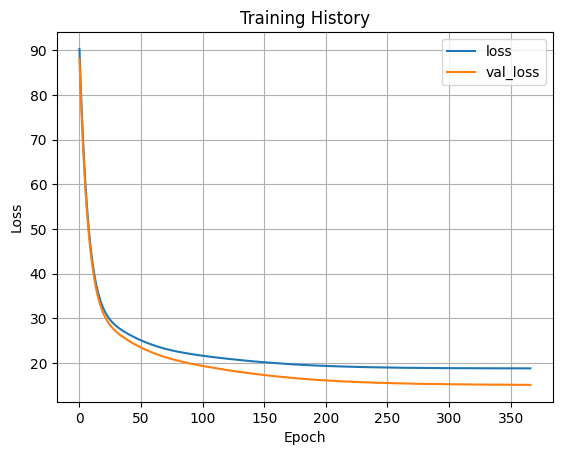

In [308]:
# Plot the training history
history_df_custom_reg_big = pd.DataFrame(history_custom_reg_big.history)
history_df_custom_reg_big[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.grid(True)
plt.show()

In [315]:
# Predict on the test set
y_pred_keras_custom_reg_big = keras_custom_reg_big.predict(x_test_part4)

# Calculate the Mean Squared Error
mse_keras_custom_reg_big = mean_squared_error(y_test_part4, y_pred_keras_custom_reg_big)
print(f"Mean Squared Error (Keras - Custom Reg Big): {mse_keras_custom_reg_big}")

# Calculate the R2 score
r2_keras_custom_reg_big = r2_score(y_test_part4, y_pred_keras_custom_reg_big)
print(f"R2 Score (Keras): {r2_keras_custom_reg_big}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
Mean Squared Error (Keras - Custom Reg Big): 15.174883198797495
R2 Score (Keras): 0.11665516334240011


In [314]:
# Get the coefficients from the Keras model
keras_custom_reg_coefs_big = keras_custom_reg_big.layers[0].get_weights()[0].flatten()

# Compare the coefficients
comparison_df_custom_reg_big = pd.DataFrame({
    'Real Coefficients': real_coefs,
    'Keras Custom Reg Big Coefficients': keras_custom_reg_coefs_big
})

print(comparison_df_custom_reg_big)

   Real Coefficients  Keras Custom Reg Big Coefficients
0                1.4                           0.184913
1                0.9                           0.145051
2                0.1                           0.090623
3               -3.0                          -0.087627
4                2.2                           0.222962
5               -1.3                          -0.010943


## This is not bad.
 - What would the MSE of the best CONSTANT guess for `y`?

In [311]:
# Calculate the mean of y
y_mean = np.mean(y)

# Create constant array
y_constant = np.full_like(y, y_mean)

# Calculate the MSE for the constant guess
mse_constant = mean_squared_error(y, y_constant)

print(f"Mean Squared Error of the best constant guess for y: {mse_constant}")

Mean Squared Error of the best constant guess for y: 18.74503907572611


## Comments

Turning up the regularization leads to higher MSE, indicating that the model's predictive error on the test set has increased. The decline in the R2 score suggests that the model's ability to explain the variance in the data has weakened, possibly because the regularization intensity is set too high, causing the model to be overly simplified and underfitted. Meanwhile, the large difference between the real coefficients and the Keras Coefficients indicates that the regularization has excessively compressed the model coefficients, deviating from their true values, which further supports the view that the model may be underfitted.